In [3]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt, seaborn as sns # visualization library
import numpy as np, pandas as pd              # library for scientific computing and matrix operations

In [4]:
## Google Colab- Google Drive connections instructions 

# This step needs to be done for the first time when you're reading something from the Shared Project Folder 
# Please navigate to "Shared with me" on your Gdrive home sceen
# Right click on the "NLP-Group1-FinalProj" (the primary folder for this project) and select "Add shortcut to Drive"
# This way the below code can find a link to the Project drive folder through your own drive.


# Mounting your personal Gdrive to the Colab notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
# Reading only 500,000 reviews to process easily
groc_data = pd.read_csv('drive/My Drive/NLP-Group1-FinalProj/Data/Processed/groc_amz_data_processed.csv.gz', sep=',', compression="gzip")
groc_data = groc_data.drop(columns=groc_data.columns[0])

In [8]:
existing_output = pd.read_csv('drive/My Drive/NLP-Group1-FinalProj/Data/Output/groc_data_BERT_output.csv')
existing_output = existing_output.drop(columns=existing_output.columns[0])
existing_output['review_text'] = existing_output['review_text'].astype(str)

In [9]:
existing_output.head()

,review_text,review_sentiment_score
0,this dulce de leche delicious. i used fill pum...,0.999214
1,mate actually tea tea-like beverage originatin...,0.930808
2,all cheeses included assortment fresh deliciou...,0.999049
3,"this authentic greek cheese assortment,contain...",0.999562
4,gave parents xmas. they loved it. said reminde...,0.997630


In [10]:
###### Creating duplicates ######

amz_rev_sentiment = pd.merge(existing_output, groc_data[["review_headline","rating","review_text","review_text_processed"]], 
                             left_on="review_text", right_on="review_text_processed", 
                             how="left")

In [18]:
amz_rev_sentiment.to_csv('drive/My Drive/NLP-Group1-FinalProj/Data/Output/groc_data_BERT_full_output')

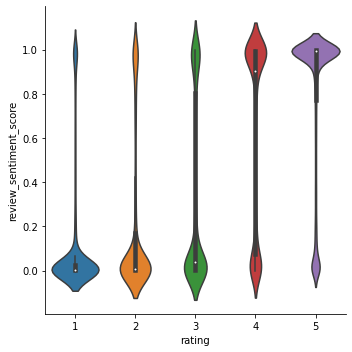

In [12]:
sns.catplot(x="rating", y="review_sentiment_score",
            kind="violin", split=True, data=amz_rev_sentiment)
plt.show()

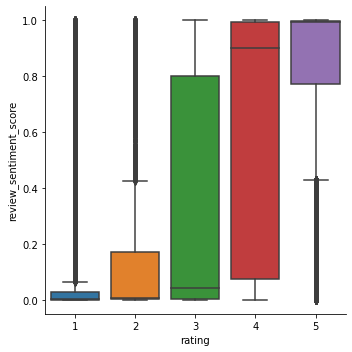

In [14]:
sns.catplot(x="rating", y="review_sentiment_score",
            kind="box", data=amz_rev_sentiment)

In [ ]:
amz_rev_sentiment.describe()

,review_sentiment_score,rating
count,7121.000000,7121.000000
mean,0.642729,4.277349
std,0.435372,1.263980
min,0.000228,1.000000
25%,0.056645,4.000000
50%,0.962805,5.000000
75%,0.998154,5.000000
max,0.999813,5.000000
